In [2]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
%matplotlib inline

In [3]:
def get_triangle_equi(orientation):
    # define vertices of triangle
    vertices = np.array([[-0.5, -np.sqrt(3)/6], [0.5, -np.sqrt(3)/6], [0, np.sqrt(3)/3], [-0.5, -np.sqrt(3)/6]], dtype=np.float32)

    # rotate triangle to an angle of orientation
    rot_mat = np.array([[np.cos(orientation), -np.sin(orientation)],
                        [np.sin(orientation), np.cos(orientation)]])

    vertices = np.dot(vertices, rot_mat)
    return vertices

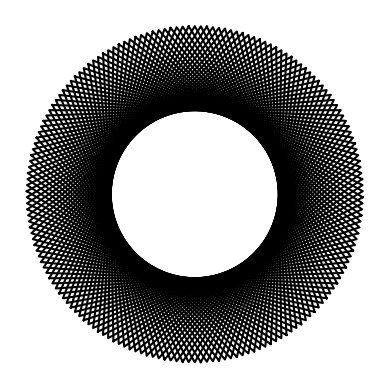

In [13]:
nb_triangles = 58

orientations = np.linspace(0, 2*np.pi, nb_triangles, endpoint=False)
triangles = np.array([get_triangle_equi(orientation) for orientation in orientations])

plt.plot(triangles[:, :, 0].T, triangles[:, :, 1].T, color='k')

# remove axis
plt.axis('off')
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

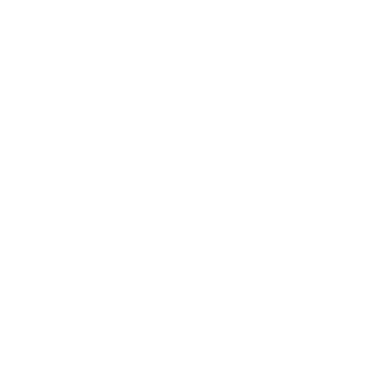

In [88]:
max_triangles = 100

# create an animation
fig = plt.figure()
ax = plt.axes(xlim=(-1, 1), ylim=(-1, 1))
ax.axis('off')
ax.set_aspect('equal', adjustable='box')
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(n):
    print(n)
    orientations = np.linspace(0, 2*np.pi, n, endpoint=False)
    triangles = np.array([get_triangle_equi(orientation) for orientation in orientations])
    x = triangles[:, :, 0].T
    y = triangles[:, :, 1].T
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=max_triangles, interval=1000, blit=True, repeat=True)

plt.show()

#anim.save('triangles.gif', writer='ffmpeg', fps=30)